<a href="https://colab.research.google.com/github/sergiusz28/Coronavirus_analysis/blob/master/Coronavirus_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Dane na dzień 03.04.2020</h1>

In [0]:
import pandas as pd
import scipy.integrate
import matplotlib.pyplot as plt

In [14]:
cd "/content/drive/My Drive/Colab Notebooks/Coronavirus_analysis"

/content/drive/My Drive/Colab Notebooks/Coronavirus_analysis


In [18]:
df = pd.read_csv('Zarażenia.csv', sep=';', index_col='OBJECTID')
df.head()

,Województwo,Aktualnie zarażeni,Zmarli,Wyleczeni,Hospitalizacja,Kwarantanna,Nadzór,Nadzór w przeliczeniu,Źródło,Data informacji
OBJECTID,,,,,,,,,,
8,dolnośląskie,414,6.0,4.0,270,4598,2316,79.86,Urząd Wojewódzki,"kwietnia 3, 2020"
3,kujawsko-pomorskie,218,1.0,5.0,156,11284,1150,55.43,Urząd Wojewódzki,"kwietnia 3, 2020"
10,łódzkie,234,3.0,22.0,33,4341,1877,76.30,Urząd Wojewódzki,"kwietnia 3, 2020"
15,lubelskie,137,6.0,22.0,41,8014,3185,150.79,Urząd Wojewódzki,"kwietnia 3, 2020"
13,lubuskie,55,NaN,4.0,33,286,636,62.78,Urząd Wojewódzki,"kwietnia 3, 2020"


## Prezentacja danych na temat pandemi w podziale na województwa

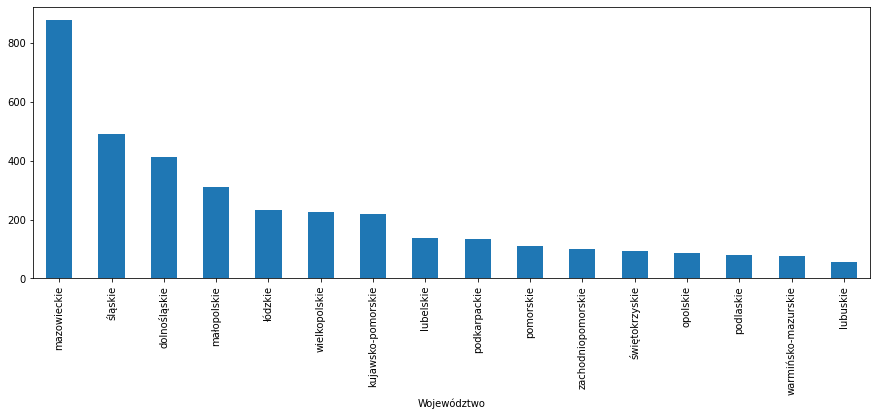

In [29]:
df_region = df.groupby('Województwo')['Aktualnie zarażeni'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

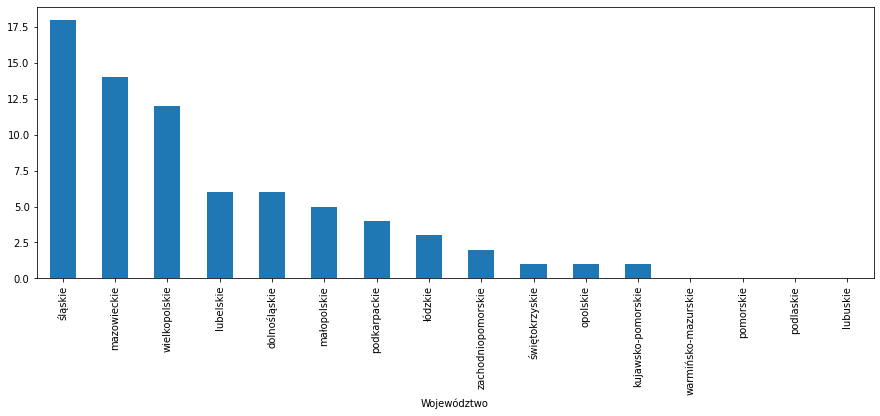

In [30]:
df_region = df.groupby('Województwo')['Zmarli'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

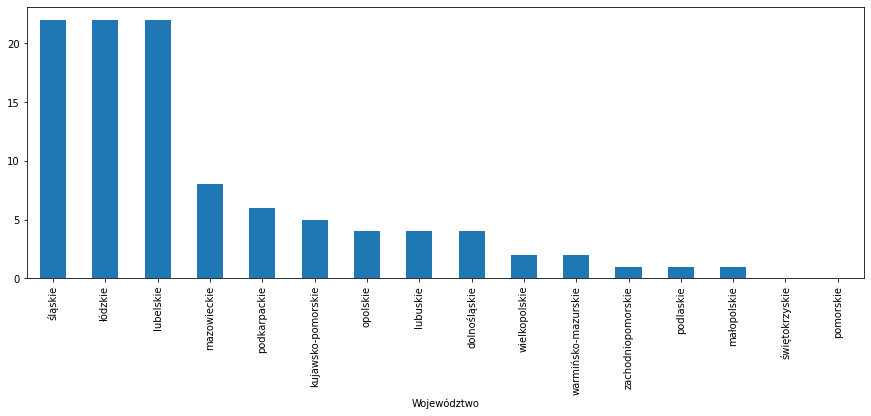

In [31]:
df_region = df.groupby('Województwo')['Wyleczeni'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

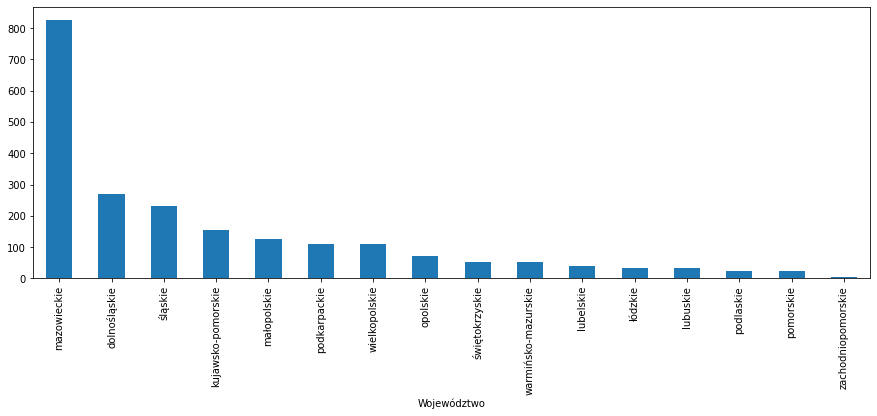

In [32]:
df_region = df.groupby('Województwo')['Hospitalizacja'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

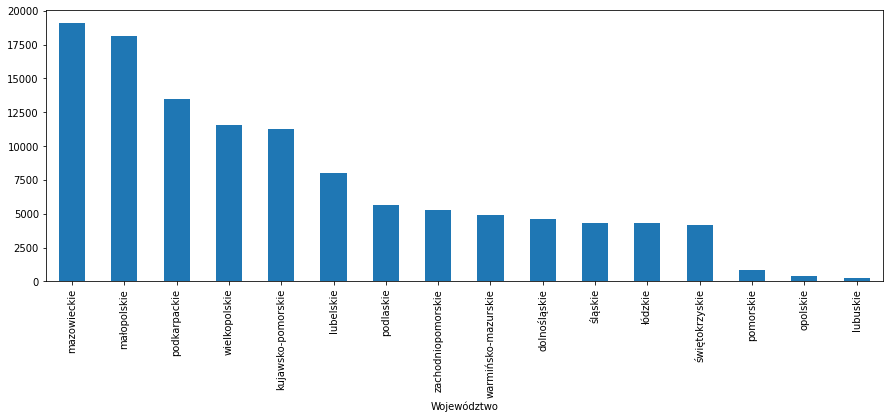

In [33]:
df_region = df.groupby('Województwo')['Kwarantanna'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

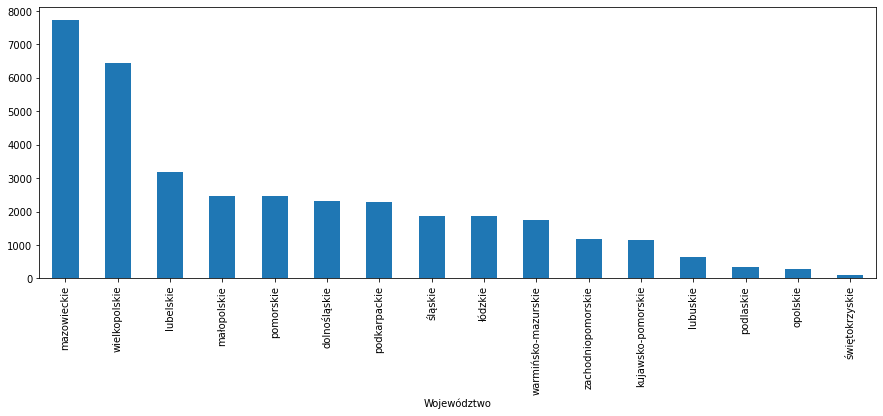

In [34]:
df_region = df.groupby('Województwo')['Nadzór'].sum()
df_region = df_region.sort_values(ascending=False)
df_region.plot(kind='bar', figsize=(15,5))
plt.show()

## Analiza przebiegu pandemii

In [38]:
df_agregate_by_day = df.groupby('Data informacji')['Aktualnie zarażeni'].sum()
df_agregate_by_day.head()

Data informacji
kwietnia 3, 2020    3643
Name: Aktualnie zarażeni, dtype: int64

In [0]:
def seincrad_model_with_lockdown(state, t, beta, eps, eta, kappa,
      mr, reduction_level, sigma, omega, ndr, lockdown_day):
 
   if t >= lockdown_day:
       beta = reduction_level * beta
       
   s, e, i, n, c, r, a, d = state
   dsdt = -beta * i * s
   dedt = beta * i * s - eps * e
   didt = eps * e - eta * (1-ndr) * i - sigma * ndr * i
   dndt = sigma * ndr * i
   dcdt = eta * (1-ndr) * i
   drdt = kappa * (1-mr) * a
   dadt = eta * (1-ndr) * i - kappa * (1-mr) * a - omega * mr * a
   dddt = mr * omega * a
   
   return [dsdt, dedt, didt, dndt, dcdt, drdt, dadt, dddt]